In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('zippedData/imdb-Copy1.kaggle.metadata.zip')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [33]:
pd.set_option('max_columns', None)

In [34]:
#Sorting out only the movies that have enough votes
df_top_scores = df[df['num_voted_users'] > 100000]

In [36]:
#taking out NA director name movies
df_top_scores = df_top_scores[df_top_scores['director_name'].notna()]

In [40]:
#sorting by top 10 imdb score rated movies
df_top_scores.sort_values('imdb_score', ascending=False).head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1937,Color,Frank Darabont,199.0,142.0,0.0,461.0,Jeffrey DeMunn,11000.0,28341469.0,Crime|Drama,Morgan Freeman,The Shawshank Redemption,1689764,13495,Bob Gunton,0.0,escape from prison|first person narration|pris...,http://www.imdb.com/title/tt0111161/?ref_=fn_t...,4144.0,English,USA,R,25000000.0,1994.0,745.0,9.3,1.85,108000
3466,Color,Francis Ford Coppola,208.0,175.0,0.0,3000.0,Marlon Brando,14000.0,134821952.0,Crime|Drama,Al Pacino,The Godfather,1155770,28122,Robert Duvall,1.0,crime family|mafia|organized crime|patriarch|r...,http://www.imdb.com/title/tt0068646/?ref_=fn_t...,2238.0,English,USA,R,6000000.0,1972.0,10000.0,9.2,1.85,43000
2837,Color,Francis Ford Coppola,149.0,220.0,0.0,3000.0,Al Pacino,22000.0,57300000.0,Crime|Drama,Robert De Niro,The Godfather: Part II,790926,39960,Robert Duvall,1.0,1950s|corrupt politician|lake tahoe nevada|mel...,http://www.imdb.com/title/tt0071562/?ref_=fn_t...,650.0,English,USA,R,13000000.0,1974.0,14000.0,9.0,1.85,14000
66,Color,Christopher Nolan,645.0,152.0,22000.0,11000.0,Heath Ledger,23000.0,533316061.0,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,57802,Morgan Freeman,0.0,based on comic book|dc comics|psychopath|star ...,http://www.imdb.com/title/tt0468569/?ref_=fn_t...,4667.0,English,USA,PG-13,185000000.0,2008.0,13000.0,9.0,2.35,37000
4498,Color,Sergio Leone,181.0,142.0,0.0,24.0,Luigi Pistilli,16000.0,6100000.0,Western,Clint Eastwood,"The Good, the Bad and the Ugly",503509,16089,Enzo Petito,3.0,civil war|hitman|outlaw|shootout|spaghetti wes...,http://www.imdb.com/title/tt0060196/?ref_=fn_t...,780.0,Italian,Italy,Approved,1200000.0,1966.0,34.0,8.9,2.35,20000
3355,Color,Quentin Tarantino,215.0,178.0,16000.0,857.0,Eric Stoltz,13000.0,107930000.0,Crime|Drama,Bruce Willis,Pulp Fiction,1324680,16557,Phil LaMarr,1.0,black comedy|cunnilingus|neo noir|nonlinear ti...,http://www.imdb.com/title/tt0110912/?ref_=fn_t...,2195.0,English,USA,R,8000000.0,1994.0,902.0,8.9,2.35,45000
4822,Black and White,Sidney Lumet,177.0,96.0,0.0,253.0,Lee J. Cobb,359.0,NaN,Crime|Drama,Jack Warden,12 Angry Men,447785,1433,John Fiedler,1.0,courtroom|dialogue driven|dialogue driven stor...,http://www.imdb.com/title/tt0050083/?ref_=fn_t...,888.0,English,USA,Not Rated,350000.0,1957.0,259.0,8.9,1.66,40000
339,Color,Peter Jackson,328.0,192.0,0.0,416.0,Billy Boyd,5000.0,377019252.0,Action|Adventure|Drama|Fantasy,Orlando Bloom,The Lord of the Rings: The Return of the King,1215718,6434,Bernard Hill,2.0,battle|epic|king|orc|ring,http://www.imdb.com/title/tt0167260/?ref_=fn_t...,3189.0,English,USA,PG-13,94000000.0,2003.0,857.0,8.9,2.35,16000
1874,Black and White,Steven Spielberg,174.0,185.0,14000.0,212.0,Embeth Davidtz,14000.0,96067179.0,Biography|Drama|History,Liam Neeson,Schindler's List,865020,15233,Caroline Goodall,0.0,german|german soldier|jew|jewish|nazi,http://www.imdb.com/title/tt0108052/?ref_=fn_t...,1273.0,English,USA,R,22000000.0,1993.0,795.0,8.9,1.85,41000
683,Color,David Fincher,315.0,151.0,21000.0,637.0,Meat Loaf,11000.0,37023395.0,Drama,Brad Pitt,Fight Club,1347461,13209,Eugenie Bondurant,2.0,anti establishment|dark humor|fighting|multipl...,http://www.imdb.com/title/tt0137523/?ref_=fn_t...,2968.0,English,USA,R,63000000.0,1999.0,783.0,8.8,2.35,48000


In [54]:
#getting a list of top 10 directors
top_10_directors = df_top_scores.sort_values('imdb_score', ascending=False).head(10)['director_name'].values

In [55]:
#getting the average imdb score of top 10 directors
dir_avg_score = []

for director in df_top_scores.sort_values('imdb_score', ascending=False).head(10)['director_name'].values: 
    dir_avg_score.append(df[df['director_name'] == director]['imdb_score'].mean())

dir_avg_score

[7.9750000000000005,
 7.418181818181819,
 7.418181818181819,
 8.425,
 8.475,
 8.2,
 7.183333333333334,
 7.675000000000001,
 7.480769230769232,
 7.75]

<BarContainer object of 10 artists>

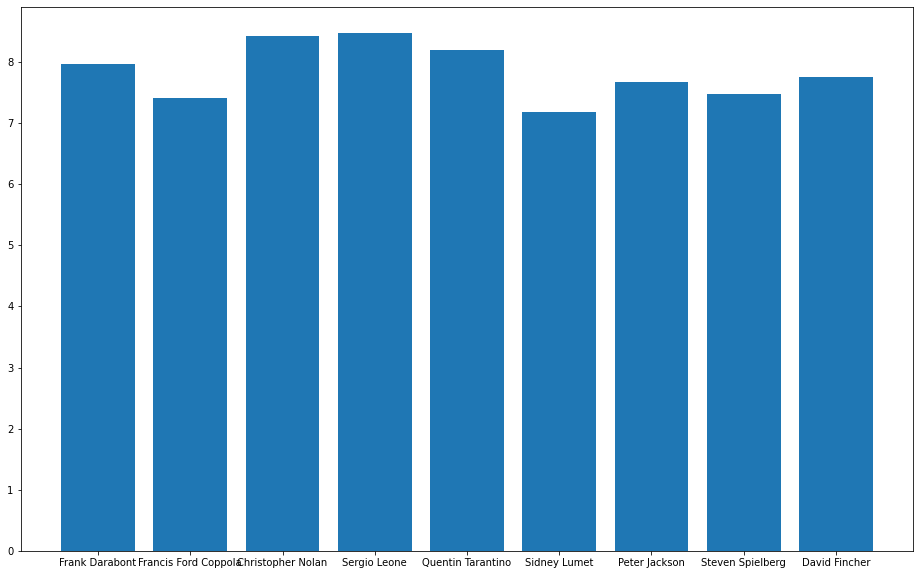

In [56]:
#bar graph of average imdb score of top 10 directors
fig, ax = plt.subplots(figsize=(16,10))

x = top_10_directors
y = dir_avg_score

ax.bar(x, y)